# Statistical Learning Theory. Exam project

Here is the description of what you need to do at your final project

<b>Deadline:</b> 27.12.2018, 9 a.m. (there would be no soft deadline)

<b>How to hang in?</b> You need to put your Jupyter Notebook and dataset to GitHub repo and send link in Telegram to <b>@CroCode</b>

<b>NB!</b> Please, write comments at your code: I need to somehow understand what are you doing

## Choosing dataset

At first you need to choose the dataset for analysis. I want you to find the problem that would be interesting for you (maybe something related to your area of work etc.)

I suggest you to use 2 most popular sources of data:

1) UCI machine learning repository https://archive.ics.uci.edu/ml/datasets.html

2) Kaggle https://www.kaggle.com/datasets

And to make this task more interesting, I ask you not to choose the same datasets. Please, fill in the Google form with your name and chosen dataset: https://docs.google.com/spreadsheets/d/1Kv7TY5mTgxWASdcmmHAE8H1i7pSLHXtVsllio7RQFPU/edit?usp=sharing

## Preprocessing data

You need to show that you understand correctly how the data should be preprocessed, i.e. what to do with categorical data, missing values etc. I ask you to explain why you did this very preprocessing (take into account that preprocessing often depends on model type)

<b>Total:</b> <i>2 points</i>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import multiprocessing
from collections import Counter
import re
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import operator
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
news = pd.read_csv("uci-news-aggregator.csv")

In [4]:
# Set index
news.set_index('ID', inplace=True)

# Add full names to categories
news.replace({'CATEGORY':{'b':'Buisness', 't':'Science', 'e':'Entertainment', 'm':'Health'}}, inplace=True)

<b>Frequency of each news category</b>

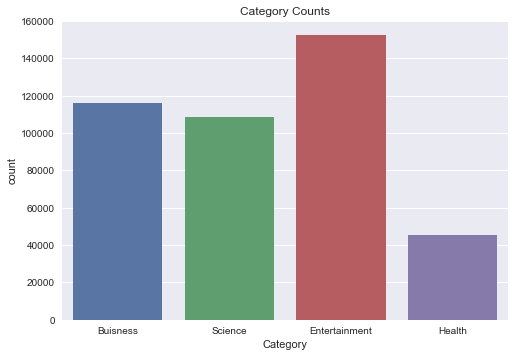

In [5]:
ax = sns.countplot(news['CATEGORY'])
ax.set_title("Category Counts")
ax.set_xlabel("Category")
plt.show()

As we can see we have disbalance beetween category 'Health' and others. We need to account for that later.

### Text Preprocessing

In [6]:
news['TITLE'].head(10)

ID
1     Fed official says weak data caused by weather,...
2     Fed's Charles Plosser sees high bar for change...
3     US open: Stocks fall after Fed official hints ...
4     Fed risks falling 'behind the curve', Charles ...
5     Fed's Plosser: Nasty Weather Has Curbed Job Gr...
6     Plosser: Fed May Have to Accelerate Tapering Pace
7             Fed's Plosser: Taper pace may be too slow
8     Fed's Plosser expects US unemployment to fall ...
9     US jobs growth last month hit by weather:Fed P...
10    ECB unlikely to end sterilisation of SMP purch...
Name: TITLE, dtype: object

We will be doing some basic text preprocessing techniques:

#### Lowercase

In [7]:
news['TITLE'] = [t.lower() for t in news['TITLE']]

In [8]:
news['TITLE']= news['TITLE'].apply(str.lower)

#### Replace Contractions

In [9]:
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]

In [10]:
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

In [11]:
news['TITLE'] = news['TITLE'].apply(replaceContraction)

In [12]:
news['TITLE'].head(10)

ID
1     fed official says weak data caused by weather,...
2     fed is charles plosser sees high bar for chang...
3     us open: stocks fall after fed official hints ...
4     fed risks falling 'behind the curve', charles ...
5     fed is plosser: nasty weather has curbed job g...
6     plosser: fed may have to accelerate tapering pace
7            fed is plosser: taper pace may be too slow
8     fed is plosser expects us unemployment to fall...
9     us jobs growth last month hit by weather:fed p...
10    ecb unlikely to end sterilisation of smp purch...
Name: TITLE, dtype: object

#### Remove punctuation

In [13]:
translator = str.maketrans('', '', string.punctuation)
news['TITLE'] = [t.translate(translator) for t in news['TITLE']]

In [14]:
news['TITLE'].head(10)

ID
1     fed official says weak data caused by weather ...
2     fed is charles plosser sees high bar for chang...
3     us open stocks fall after fed official hints a...
4     fed risks falling behind the curve charles plo...
5     fed is plosser nasty weather has curbed job gr...
6      plosser fed may have to accelerate tapering pace
7             fed is plosser taper pace may be too slow
8     fed is plosser expects us unemployment to fall...
9     us jobs growth last month hit by weatherfed pr...
10    ecb unlikely to end sterilisation of smp purch...
Name: TITLE, dtype: object

#### Remove Stopwords

In [15]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [16]:
def removeStopwords(text):
    noStopwords = []
    [noStopwords.append(w) for w in nltk.word_tokenize(text) if w not in stoplist]
    text = " ".join(noStopwords)
    return text

In [17]:
news['TITLE'] = news['TITLE'].apply(removeStopwords)

In [18]:
news['TITLE'].head(10)

ID
1     fed official says weak data caused weather slo...
2     fed charles plosser sees high bar change pace ...
3     us open stocks fall fed official hints acceler...
4     fed risks falling behind curve charles plosser...
5           fed plosser nasty weather curbed job growth
6              plosser fed may accelerate tapering pace
7                       fed plosser taper pace may slow
8     fed plosser expects us unemployment fall 62 en...
9     us jobs growth last month hit weatherfed presi...
10    ecb unlikely end sterilisation smp purchases t...
Name: TITLE, dtype: object

#### Lemmatizing

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
def Lemmatizing(text):
    lemmatized = []
    [lemmatized.append(lemmatizer.lemmatize(w)) for w in nltk.word_tokenize(text)]
    text = " ".join(lemmatized)
    return text

In [21]:
news['TITLE'] = news['TITLE'].apply(Lemmatizing)

In [22]:
news['TITLE'].head(10)

ID
1     fed official say weak data caused weather slow...
2     fed charles plosser see high bar change pace t...
3     u open stock fall fed official hint accelerate...
4     fed risk falling behind curve charles plosser say
5           fed plosser nasty weather curbed job growth
6              plosser fed may accelerate tapering pace
7                       fed plosser taper pace may slow
8     fed plosser expects u unemployment fall 62 end...
9     u job growth last month hit weatherfed preside...
10    ecb unlikely end sterilisation smp purchase tr...
Name: TITLE, dtype: object

Also we may assume that in some categories we will observe numbers more often than in others, for example in Buisness category. So we won't totally remove them but rather will recode all numbers in our titles in word 'number'.

#### Recoding numers

In [23]:
def recodeNumbers(text):
    recoded = []
    [recoded.append('number') if len((list(filter(str.isdigit, w)))) > 0 else recoded.append(w) 
     for w in nltk.word_tokenize(text)]
    text = " ".join(recoded)
    return text    

In [24]:
news['TITLE'] = news['TITLE'].apply(recodeNumbers)

In [25]:
news['TITLE'].head(10)

ID
1     fed official say weak data caused weather slow...
2     fed charles plosser see high bar change pace t...
3     u open stock fall fed official hint accelerate...
4     fed risk falling behind curve charles plosser say
5           fed plosser nasty weather curbed job growth
6              plosser fed may accelerate tapering pace
7                       fed plosser taper pace may slow
8     fed plosser expects u unemployment fall number...
9     u job growth last month hit weatherfed preside...
10    ecb unlikely end sterilisation smp purchase tr...
Name: TITLE, dtype: object

Also we can check for length of our title, maybe we can use it for the prediction.

#### Length of title

In [105]:
news['word_count'] = news['TITLE'].str.split().str.len()
plt.hist(news['word_count'], bins=15)
plt.show()

We see that we have some errors in our data, so we will remove few observations with to high amount of words in the title

In [118]:
max(news['word_count'])

1758

In [151]:
len(news[news['word_count']>20])

9

In [152]:
news = news[news['word_count']<20]
plt.hist(news['word_count'], bins=15)
plt.show()

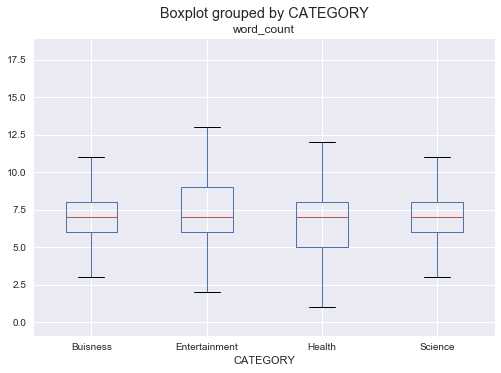

In [165]:
news.boxplot('word_count', by='CATEGORY')
plt.show()

There is not a lot of difference between number of words in each category, so we probably not gonna use that variable

## Model fitting

Depending on chosen problem you can try to use several models, fit them and choose the best.

Here you need to demonstrate the knowledge of what parameters and how you should fit, how to choose features. In addition it would be fine if you come up with some heuristic or regularization that can make your model quality better.

<b>Total:</b> <i>3 points (+ 1 extra point for heuristic or/and regularization)</i>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [63]:
# Bag of Words Representation
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(news['TITLE'])

# Create numerical labels
encoder = LabelEncoder()
y = encoder.fit_transform(news['CATEGORY'])

# Save labels
encoder_mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

For better time perfomance we will not split our data with cross-validation and will use just 80% of intial data as train and 20% as test.

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Multinomial NBC

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
mnb = MultinomialNB()

In [67]:
%%time
mnb.fit(x_train, y_train)

Wall time: 147 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
print('Train F1 score:', f1_score(mnb.predict(x_train), y_train, average='weighted'))
print('Test F1 score:', f1_score(mnb.predict(x_test), y_test, average='weighted'))

Train F1 score: 0.9327624340515244
Test F1 score: 0.9233043353781706


We got pretty good score with Naive Bayesian Classifer, but what if with other methods we can get even better result?

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
%%time
lr.fit(x_train, y_train)

Wall time: 25.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print('Train F1 score:', f1_score(lr.predict(x_train), y_train, average='weighted'))
print('Test F1 score:', f1_score(lr.predict(x_test), y_test, average='weighted'))

Train F1 score: 0.9602882145664263
Test F1 score: 0.9449449754698048


#### SVM

In [44]:
from sklearn.svm import LinearSVC

In [45]:
svc = LinearSVC()

In [46]:
%%time
svc.fit(x_train, y_train)

Wall time: 51.8 s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
print('Train F1 score:', f1_score(svc.predict(x_train), y_train, average='weighted'))
print('Test F1 score:', f1_score(svc.predict(x_test), y_test, average='weighted'))

Train F1 score: 0.9717465991399509
Test F1 score: 0.9457754114341846


In general all three models clasify our categories pretty fine. Logistic Regression and SVM have slightly better results but evaluations take much more time comparing to Naive Bayesian Classifier. We can use here F1 score as well as accuracy, results of these two metrics will be pretty close to eqch other.

## Quality measuring and results

Provide several relevant metrics of model quality. Make conlusion upon the model, overfitting etc.

<b>Total:</b> <i>2 points</i>

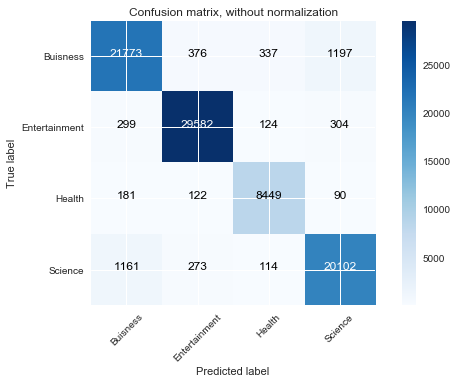

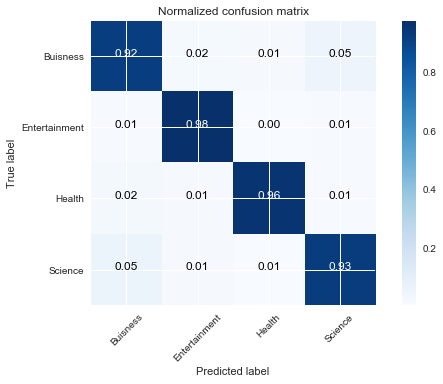

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(svc.predict(x_test), y_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(encoder_mapping.values()),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(encoder_mapping.values()), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

We can see that some categories are harder to predict than others. Entertainment and Health have almost ideal scores with 98% and 96%. But for Science and Buisness it's less positive picture. It's seem logical, because news from buisness sphere sometimes can be about IT for example and it will be hard even for human to correctly predict the category.

## Visualization

It's really good data scientist's character - to be able to provide fine visualization. So that you need to visualize different steps of your research: interesting moments from data distributon, quality metrics, feature importances etc. Please, try to make nice figures - for the sake of that you can look through tutorials on Matplotlib, Seaborn, Plotly etc.

<b>Total:</b> <i>3 points</i>

## HINT

For well known datasets (especially on Kaggle) guys usually share kernels - Jupyter Notebooks with ideas of solution. I don't advise you to take some interesting solution and say that it's yours - I'm just telling you that sometimes it could be helpful to study others' thoughts in order to get idea for new heuristic :)